## <font color='red'>Classifying Sincere and Insincere questions</font>

## <font color='Blue'>Team Darth Vader </font>
#### Bharatbhai Vora(C0851032)
#### Mohammad Imran Uddin(C0800487)
#### Hardik Solanki(C0852302)
#### Yug Dev Bhandari(C0852634)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
import nltk

C:\Users\hardi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [7]:
df_train1 = df_train.copy( ) # For Visualization purpose

In [17]:
df_train.shape

(1306122, 3)

In [18]:
df_train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [19]:
df_test.shape

(375806, 2)

In [20]:
df_test.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   qid            375806 non-null  object
 1   question_text  375806 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB



### Exploratory Data Analysis 

In [12]:
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=10)

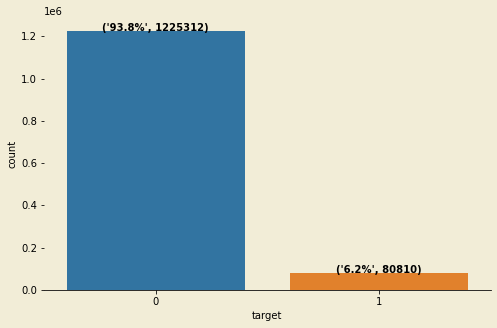

In [13]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='x',color='gray')

a=sns.countplot(data=df_train,x='target')
without_hue(df_train,'target',a)

### Getting the length of each sentence

In [14]:
def length(text):
    length = len(text.split(" "))
    return(length)

df_train1['length'] = df_train1['question_text'].apply(length)

df_train1.head()

,qid,question_text,target,length
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15


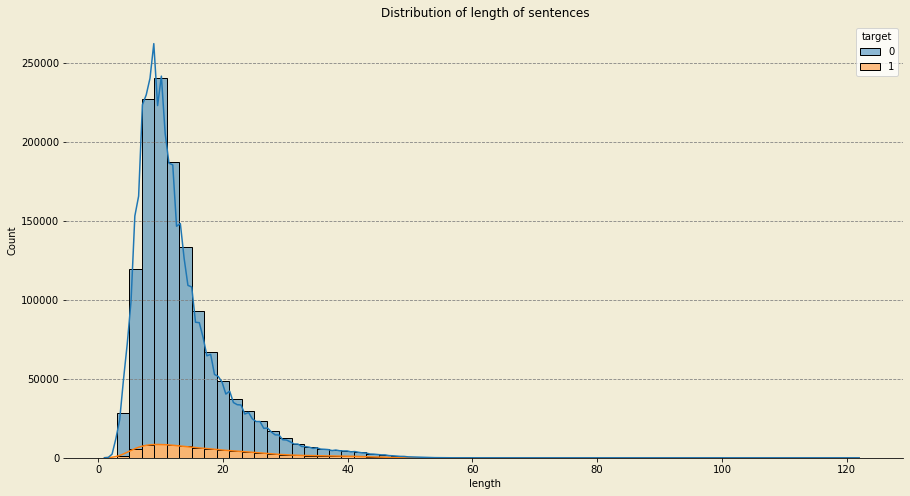

In [16]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes()
plt.title('Distribution of length of sentences')
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')

a=sns.histplot(data=df_train1,x='length',hue='target',kde=True,binwidth=2,multiple='stack')


### Text-Preprocessing

In [21]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def remove_stopwords(text):
    text = str(text).lower()
    text = text.split(" ")
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(i) for i in text if i not in set(stopwords.words('english'))]
    text = " ".join(text)
    return(text)
    

df_train1['question_text'] = df_train1['question_text'].apply(remove_stopwords)

In [22]:
df_train1.head()

,qid,question_text,target,length
0,00002165364db923c7e6,quebec nationalist see province nation 1960s?,0,13
1,000032939017120e6e44,"adopted dog, would encourage people adopt shop?",0,16
2,0000412ca6e4628ce2cf,velocity affect time? velocity affect space ge...,0,10
3,000042bf85aa498cd78e,otto von guericke used magdeburg hemispheres?,0,9
4,0000455dfa3e01eae3af,convert montra helicon mountain bike changing ...,0,15


In [23]:
df_train_sin = df_train1.loc[df_train1['target']==0]
df_train_insin = df_train1.loc[df_train1['target']==1]

In [24]:
df_train_sin.head()

,qid,question_text,target,length
0,00002165364db923c7e6,quebec nationalist see province nation 1960s?,0,13
1,000032939017120e6e44,"adopted dog, would encourage people adopt shop?",0,16
2,0000412ca6e4628ce2cf,velocity affect time? velocity affect space ge...,0,10
3,000042bf85aa498cd78e,otto von guericke used magdeburg hemispheres?,0,9
4,0000455dfa3e01eae3af,convert montra helicon mountain bike changing ...,0,15


In [25]:
df_train_insin.head()

,qid,question_text,target,length
22,0000e91571b60c2fb487,united state become largest dictatorship world?,1,11
30,00013ceca3f624b09f42,baby sweeter parents? dark skin baby light ski...,1,15
110,0004a7fcb2bf73076489,black support school choice mandatory sentenci...,1,15
114,00052793eaa287aff1e1,"gay boy love cousin (boy). sexy, dont know do....",1,34
115,000537213b01fd77b58a,race smallest penis?,1,6


In [26]:
def get_count(dataframe):
    dic = {}
    for i in dataframe['question_text']:
        for j in i.split(" "):
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1
            
    dic = sorted(dic.items() , key = lambda x:x[1],reverse=True)
    return(dic)


dic_sin = get_count(df_train_sin)
dic_insin = get_count(df_train_insin)

In [27]:
dic_sin_top = []
dic_sin_topcount = []
dic_insin_top = []
dic_insin_topcount = []

count = 0
for i in dic_sin:
    if(count<50):
        dic_sin_top.append(i[0])
        dic_sin_topcount.append(i[1])
    else:
        break
        
for i in dic_insin:
    if(count<50):
        dic_insin_top.append(i[0])
        dic_insin_topcount.append(i[1])
    else:
        break

Text(0.5, 1.0, 'Top words used in insincere questions')

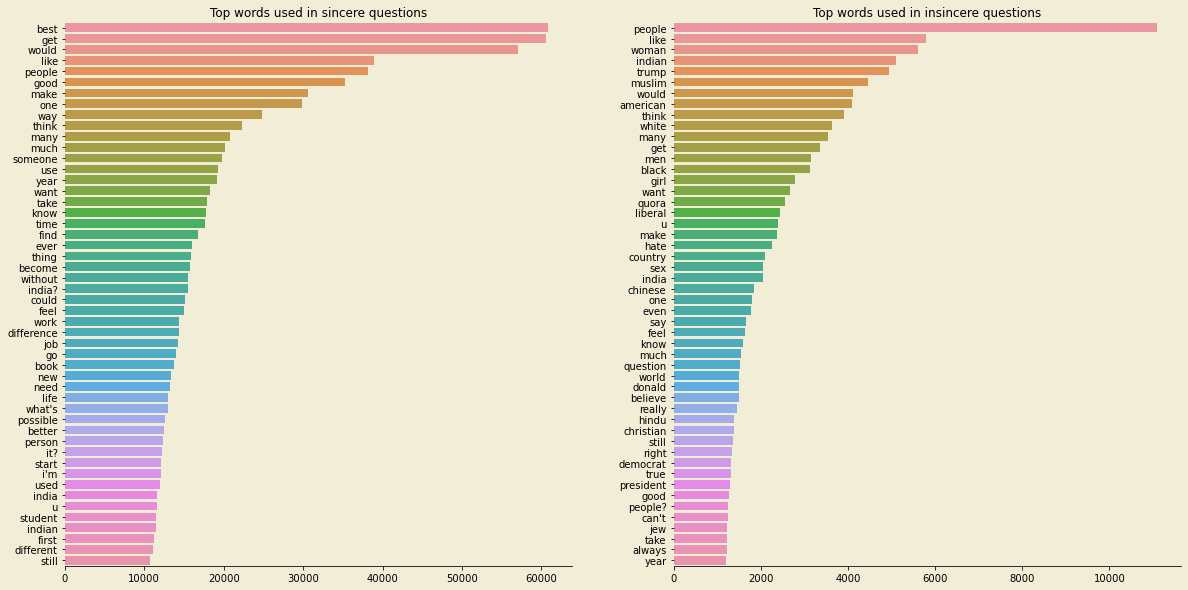

In [28]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
fig.patch.set_facecolor('#F2EDD7FF')

for i in range(0,2):
    ax[i].set_facecolor('#F2EDD7FF')
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].grid(linestyle="--",axis='y',color='gray')

    

sns.barplot(y=dic_sin_top[0:50],x=dic_sin_topcount[0:50],ax=ax[0])
sns.barplot(y=dic_insin_top[0:50],x=dic_insin_topcount[0:50],ax=ax[1])
ax[0].set_title("Top words used in sincere questions")
ax[1].set_title("Top words used in insincere questions")

In [29]:
from nltk import ngrams

def getting_bigrams(dataframe):
    
    dic = {}
    for i in dataframe['question_text']:
        bigrams = ngrams(i.split(" "),2)
        for j in bigrams:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1
                
    dic = sorted(dic.items(),key= lambda x:x[1],reverse=True)
    
    return(dic)
    
dic_sin_bigrams = getting_bigrams(df_train_sin)
dic_insin_bigrams = getting_bigrams(df_train_insin)

In [30]:
dic_sin_topbigrams = []
dic_sin_topcountbigrams = []
dic_insin_topbigrams = []
dic_insin_topcountbigrams = []

count = 0
for i in dic_sin_bigrams:
    count+=1
    if(count<50):
        dic_sin_topbigrams.append(i[0])
        dic_sin_topcountbigrams.append(i[1])
    else:
        break

count1 = 0
for i in dic_insin_bigrams:
    count1+=1
    if(count1<50):
        dic_insin_topbigrams.append(i[0])
        dic_insin_topcountbigrams.append(i[1])
    else:
        break


In [31]:
for i in range(0,len(dic_sin_topbigrams)):
    dic_insin_topbigrams[i] = ' '.join(dic_insin_topbigrams[i])
    dic_sin_topbigrams[i] = ' '.join(dic_sin_topbigrams[i])

Text(0.5, 1.0, 'Top bigrams used in insincere questions')

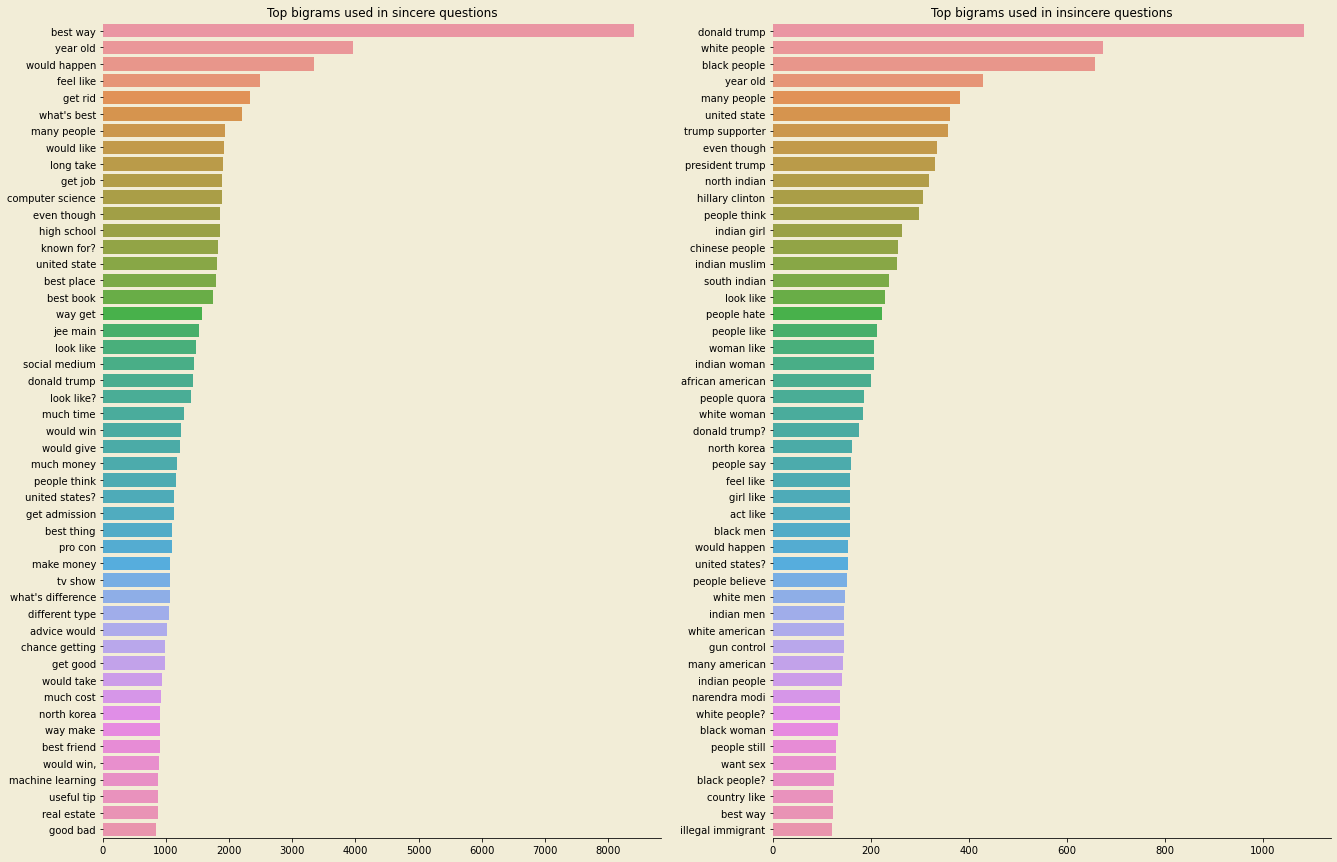

In [32]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(22,15))
fig.patch.set_facecolor('#F2EDD7FF')

for i in range(0,2):
    ax[i].set_facecolor('#F2EDD7FF')
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].grid(linestyle="--",axis='y',color='gray')

    

sns.barplot(y=dic_sin_topbigrams[0:50],x=dic_sin_topcountbigrams[0:50],ax=ax[0])
sns.barplot(y=dic_insin_topbigrams[0:50],x=dic_insin_topcountbigrams[0:50],ax=ax[1])
ax[0].set_title("Top bigrams used in sincere questions")
ax[1].set_title("Top bigrams used in insincere questions")

In [33]:
from wordcloud import WordCloud

df_sin_para = " ".join([word for word in df_train_sin['question_text']])
df_insin_para = " ".join([word for word in df_train_insin['question_text']])


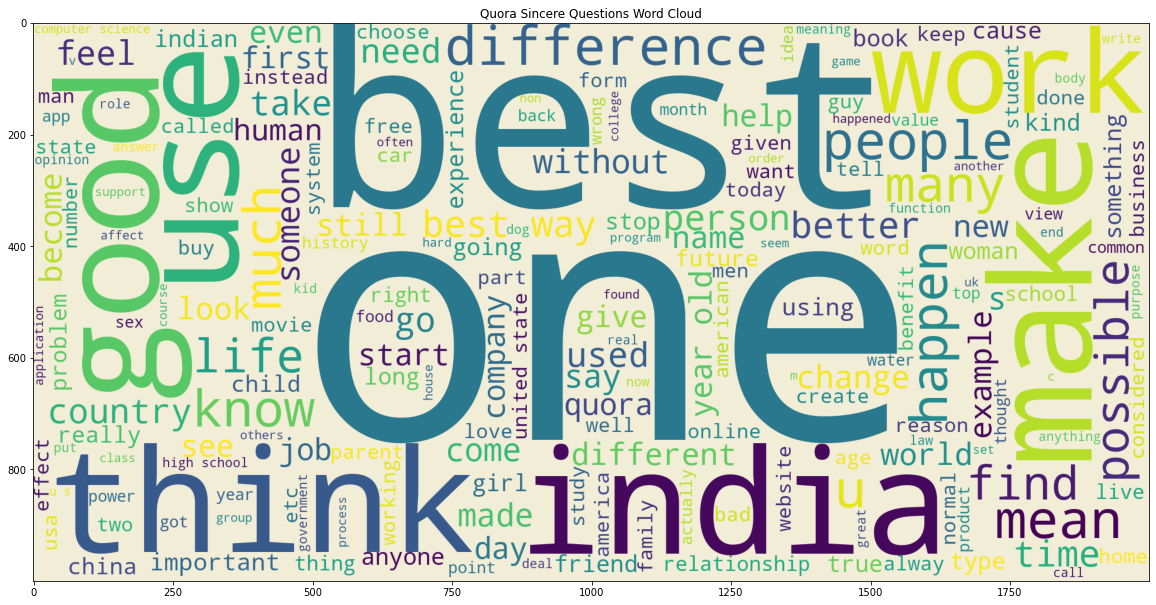

In [34]:
wordcloud=WordCloud(width=2000,height=1000,background_color='#F2EDD7FF').generate(df_sin_para)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Quora Sincere Questions Word Cloud")
plt.show()

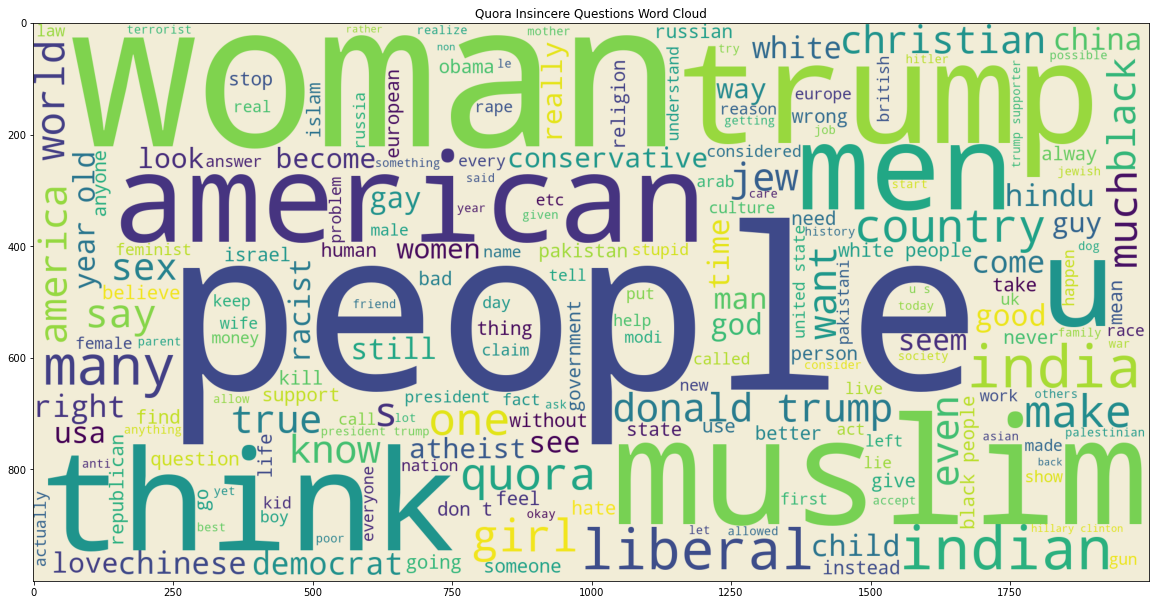

In [35]:
wordcloud=WordCloud(width=2000,height=1000,background_color='#F2EDD7FF').generate(df_insin_para)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Quora Insincere Questions Word Cloud")
plt.show()

### Modelling and Preprocessing

In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM , RNN , Dense , Flatten , Embedding , Bidirectional , SimpleRNN , Dropout , GlobalMaxPool1D , GRU
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , f1_score , roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau

### Class Imbalance Handling

In [41]:
Count_Normal_transacation = len(df_train[df_train["target"]==0])
Count_insincere_transacation = len(df_train[df_train["target"]==1]) 
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_insincere_transacation)
print("percentage of sencere questions is: ",Percentage_of_Normal_transacation*100)
Percentage_of_insincere_transacation= Count_insincere_transacation/(Count_Normal_transacation+Count_insincere_transacation)
print("percentage of insencere questions is: ",Percentage_of_insincere_transacation*100)

percentage of sencere questions is:  93.81298224821265
percentage of insencere questions is:  6.187017751787352


In [44]:
insincere_indices= np.array(df_train[df_train.target==1].index)
normal_indices = np.array(df_train[df_train.target==0].index)

def undersample(normal_indices,insincere_indices,times):
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_insincere_transacation),replace=False))
    print(len(Normal_indices_undersample))
    undersample_data= np.concatenate([insincere_indices,Normal_indices_undersample])

    undersample_data = df_train.iloc[undersample_data,:]
    #print(undersample_data)
    print(len(undersample_data))

    print("the normal transacation proportion is :",len(undersample_data[undersample_data.target==0])/len(undersample_data))
    print("the fraud transacation proportion is :",len(undersample_data[undersample_data.target==1])/len(undersample_data))
    print("total number of record in resampled data is:",len(undersample_data))
    return(undersample_data)

In [47]:
print('Sencere questions length',Count_Normal_transacation,'Insencere questions length',Count_insincere_transacation)

Sencere questions length 1225312 Insencere questions length 80810


#### Here we are just undersampling the sencere questions to 80810 so that we have balanced data

In [51]:
Undersample_data = undersample(normal_indices,insincere_indices,1)

80810
161620
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 161620


In [52]:
Undersample_data.reset_index(drop=True, inplace=True)

In [54]:
Undersample_data

,qid,question_text,target
0,0000e91571b60c2fb487,Has the United States become the largest dicta...,1
1,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1
2,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1
3,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1
4,000537213b01fd77b58a,Which races have the smallest penis?,1
...,...,...,...
161615,2fe6f9e6d27d2fad9d17,Why can we not edit out the violent passages o...,0
161616,b8e1d87ccd2534721e88,If someone told me that they went bungee jupmi...,0
161617,ed2d8af1d6f15f271d04,"What is the most misandrist movie, video game,...",0
161618,171202f1f59bc4feb987,"Which is the best film school there, for an In...",0


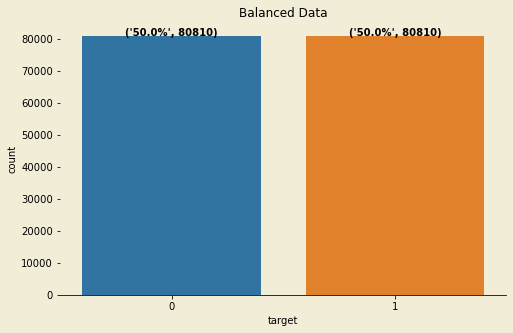

In [106]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes()
plt.title('Balanced Data')
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='x',color='gray')

a=sns.countplot(data=Undersample_data,x='target')
without_hue(Undersample_data,'target',a)

In [55]:
df_train = Undersample_data

In [59]:
train , val = train_test_split(df_train,test_size=0.2,random_state=42)

dimension_size = 300
vocabulary_size = 50000
max_length = 100

train_X = train['question_text']
val_X = val['question_text']
test_X = df_test['question_text']

tokenizer = Tokenizer(num_words=vocabulary_size)  #Initiating Tokenizer

fit_text = list(train['question_text']) #getting list of train text
tokenizer.fit_on_texts(fit_text) #fitting on text

train_X = tokenizer.texts_to_sequences(train_X) #Converting tokens of texts into sequence of integers
val_X = tokenizer.texts_to_sequences(val_X)
test_X = tokenizer.texts_to_sequences(test_X)


train_X = pad_sequences(train_X, maxlen=max_length) #Padding the text to make length of each text uniform
val_X = pad_sequences(val_X, maxlen=max_length)
test_X = pad_sequences(test_X, maxlen=max_length)

train_Y = train['target']
val_Y = val['target']

In [60]:
print(len(tokenizer.word_index))

61603


In [72]:
glove_embedded = "glove.6B.300d.txt"

def getting_glove_embedding(filename):  
    file = open(filename, 'r', encoding='utf-8') # specify the encoding as 'utf-8'
    lines = file.readlines()
    embedding = dict()
    for line in lines:
        parts = line.split()
        embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
    return embedding
    

def embedding_weights(vocab, raw_embedding):  
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, 300)) 
    
    for word, i in vocab.items():
        vector = raw_embedding.get(word)
        if vector is not None:
            weight_matrix[i] = vector
            
    return weight_matrix
            
        
raw_embedding = getting_glove_embedding(glove_embedded)
print(" Raw Embedding Loaded ")
embedding_vectors = embedding_weights(tokenizer.word_index, raw_embedding)


 Raw Embedding Loaded 


In [63]:
embedding_vectors.shape

(61604, 300)

### Bidirectional LSTM

In [77]:
embedding_layer = Embedding(len(tokenizer.word_index)+1,300,weights=[embedding_vectors])
model = Sequential()
model.add(embedding_layer)
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 300)         18481200  
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        186880    
 nal)                                                            
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_acc', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

history=model.fit(train_X,train_Y,validation_data=(val_X,val_Y),epochs=5,batch_size=512,callbacks=[checkpoint,reduce_lr])

Epoch 1/5
253/253 [==============================] - 472s 2s/step - loss: 0.3368 - accuracy: 0.8649 - val_loss: 0.2671 - val_accuracy: 0.8975 - lr: 0.0010
Epoch 2/5
253/253 [==============================] - 470s 2s/step - loss: 0.2444 - accuracy: 0.9098 - val_loss: 0.2592 - val_accuracy: 0.9021 - lr: 0.0010
Epoch 3/5
253/253 [==============================] - 480s 2s/step - loss: 0.2007 - accuracy: 0.9271 - val_loss: 0.2684 - val_accuracy: 0.9009 - lr: 0.0010
Epoch 4/5
253/253 [==============================] - 455s 2s/step - loss: 0.1660 - accuracy: 0.9408 - val_loss: 0.2876 - val_accuracy: 0.8956 - lr: 0.0010
Epoch 5/5
253/253 [==============================] - 459s 2s/step - loss: 0.1351 - accuracy: 0.9525 - val_loss: 0.3274 - val_accuracy: 0.8934 - lr: 0.0010


1011/1011 [==============================] - 69s 68ms/step


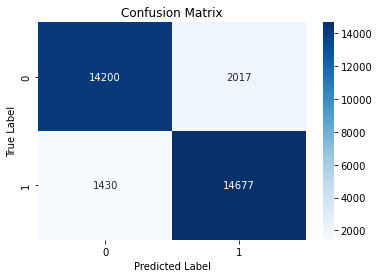

In [103]:
from sklearn.metrics import confusion_matrix

# make predictions on the test data
y_pred = model.predict(val_X)
y_pred = (y_pred > 0.5)

# compute the confusion matrix
cm = confusion_matrix(val_Y, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Let's Try our model on test set and compare the result

In [104]:
preds_test = model.predict(test_X,batch_size=512,verbose=1).squeeze()

734/734 [==============================] - 353s 480ms/step


In [91]:
test_pred= pd.DataFrame({'qid':df_test['qid'],'Question':df_test['question_text'],'prediction': preds_test})

In [92]:
test_pred.tail(30)

,qid,Question,prediction
375776,fffba95ed4c8c10e32d6,What is the origin of the Establishment Clause?,0.000054
375777,fffbf53cbe8d6b60ae51,"What should I do? I'm a 14-year-old boy, and I...",0.918420
375778,fffc0a5688ba2da6be91,Is Donald Trump the most hypocritical presiden...,0.953613
375779,fffc1e9dabf69156cbcc,What should be the consequences of reason 5?,0.004143
375780,fffc3caed869a2c3e6d7,What are the mutual fund analysis factors?,0.000224
375781,fffc3df92967fc1ff426,Why did England become the biggest colonial po...,0.552709
375782,fffc53f5ce65319d73a6,Do you have a huge crush on someone?,0.004844
375783,fffc56a41e087d93632e,How good of an admiral was Miklos Horthy in WWI?,0.049743
375784,fffc64b347b85d1c2785,Is it safe for a person to write about his car...,0.001159
375785,fffc9bd7e5f4bb34b883,Why can’t some people laugh out loud at anything?,0.205871


In [107]:
model.save("Quora_Insincere.h5")

### Sentiment Analysis

In [85]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [94]:
#calling vader object
sid_obj = SentimentIntensityAnalyzer()

#vader polarity score as mentioned as scores
test_pred['scores'] = test_pred['Question'].apply(lambda review: sid_obj.polarity_scores(review))

test_pred.head(5)

,qid,Question,prediction,scores
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,0.978705,"{'neg': 0.259, 'neu': 0.637, 'pos': 0.104, 'co..."
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,0.000050,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,0.010965,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp..."
3,000086e4b7e1c7146103,Who are entrepreneurs?,0.038839,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,0.652598,"{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp..."


In [95]:
test_pred['sentiment Compund score']  = test_pred['scores'].apply(lambda score_dict: score_dict['compound'])
test_pred.head(5)

,qid,Question,prediction,scores,sentiment Compund score
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,0.978705,"{'neg': 0.259, 'neu': 0.637, 'pos': 0.104, 'co...",-0.6590
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,0.000050,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,0.010965,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...",0.4201
3,000086e4b7e1c7146103,Who are entrepreneurs?,0.038839,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,0.652598,"{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...",0.4902


In [98]:
test_pred.drop('scores',axis=1,inplace=True)

In [100]:
test_pred.head(30)

,qid,Question,prediction,sentiment Compund score
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,0.978705,-0.6590
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,0.000050,0.0000
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,0.010965,0.4201
3,000086e4b7e1c7146103,Who are entrepreneurs?,0.038839,0.0000
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,0.652598,0.4902
5,000101884c19f3515c1a,How do you train a pigeon to send messages?,0.000797,0.0000
6,00010f62537781f44a47,What is the currency in Langkawi?,0.000581,0.0000
7,00012afbd27452239059,"What is the future for Pandora, can the busine...",0.000310,-0.3612
8,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...,0.002348,0.0000
9,000156468431f09b3cae,How much does a tutor earn in Bangalore?,0.001256,0.0000


### Training the model with sentiments and chekcing the output of the model

In [111]:
#calling vader object
sid_obj = SentimentIntensityAnalyzer()

#vader polarity score as mentioned as scores
df_train['scores'] = df_train['question_text'].apply(lambda review: sid_obj.polarity_scores(review))

df_train.head(5)

,qid,question_text,target,scores
0,0000e91571b60c2fb487,Has the United States become the largest dicta...,1,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp..."
1,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1,"{'neg': 0.261, 'neu': 0.542, 'pos': 0.197, 'co..."
3,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1,"{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp..."
4,000537213b01fd77b58a,Which races have the smallest penis?,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [112]:
df_train['sentiment Compund score']  = df_train['scores'].apply(lambda score_dict: score_dict['compound'])
df_train.head(5)

,qid,question_text,target,scores,sentiment Compund score
0,0000e91571b60c2fb487,Has the United States become the largest dicta...,1,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.4215
1,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1,"{'neg': 0.261, 'neu': 0.542, 'pos': 0.197, 'co...",-0.3182
3,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1,"{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp...",0.6428
4,000537213b01fd77b58a,Which races have the smallest penis?,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [113]:
df_train.drop('scores',axis=1,inplace=True)

In [114]:
df_train

,qid,question_text,target,sentiment Compund score
0,0000e91571b60c2fb487,Has the United States become the largest dicta...,1,0.4215
1,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1,0.0000
2,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1,-0.3182
3,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1,0.6428
4,000537213b01fd77b58a,Which races have the smallest penis?,1,0.0000
...,...,...,...,...
161615,2fe6f9e6d27d2fad9d17,Why can we not edit out the violent passages o...,0,-0.5994
161616,b8e1d87ccd2534721e88,If someone told me that they went bungee jupmi...,0,0.0000
161617,ed2d8af1d6f15f271d04,"What is the most misandrist movie, video game,...",0,0.0000
161618,171202f1f59bc4feb987,"Which is the best film school there, for an In...",0,0.6369


In [115]:
train , val = train_test_split(df_train,test_size=0.2,random_state=42)

dimension_size = 300
vocabulary_size = 50000
max_length = 100

train_X = train['question_text']
val_X = val['question_text']
test_X = df_test['question_text']

tokenizer = Tokenizer(num_words=vocabulary_size)  #Initiating Tokenizer

fit_text = list(train['question_text']) #getting list of train text
tokenizer.fit_on_texts(fit_text) #fitting on text

train_X = tokenizer.texts_to_sequences(train_X) #Converting tokens of texts into sequence of integers
val_X = tokenizer.texts_to_sequences(val_X)
test_X = tokenizer.texts_to_sequences(test_X)


train_X = pad_sequences(train_X, maxlen=max_length) #Padding the text to make length of each text uniform
val_X = pad_sequences(val_X, maxlen=max_length)
test_X = pad_sequences(test_X, maxlen=max_length)

train_Y = train['target']
val_Y = val['target']

In [117]:
print(len(tokenizer.word_index))

61603


In [116]:
glove_embedded = "glove.6B.300d.txt"

def getting_glove_embedding(filename):  
    file = open(filename, 'r', encoding='utf-8') # specify the encoding as 'utf-8'
    lines = file.readlines()
    embedding = dict()
    for line in lines:
        parts = line.split()
        embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
    return embedding
    

def embedding_weights(vocab, raw_embedding):  
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, 300)) 
    
    for word, i in vocab.items():
        vector = raw_embedding.get(word)
        if vector is not None:
            weight_matrix[i] = vector
            
    return weight_matrix
            
        
raw_embedding = getting_glove_embedding(glove_embedded)
print(" Raw Embedding Loaded ")
embedding_vectors = embedding_weights(tokenizer.word_index, raw_embedding)

 Raw Embedding Loaded 


In [118]:
embedding_vectors.shape

(61604, 300)

### Bi-Directional LSTM

In [119]:
embedding_layer = Embedding(len(tokenizer.word_index)+1,300,weights=[embedding_vectors])
model = Sequential()
model.add(embedding_layer)
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 300)         18481200  
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        186880    
 nal)                                                            
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 16)                2064      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [121]:
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_acc', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

history=model.fit(train_X,train_Y,validation_data=(val_X,val_Y),epochs=5,batch_size=512,callbacks=[checkpoint,reduce_lr])

Epoch 1/5
253/253 [==============================] - 731s 3s/step - loss: 0.3254 - accuracy: 0.8695 - val_loss: 0.2644 - val_accuracy: 0.8972 - lr: 0.0010
Epoch 2/5
253/253 [==============================] - 790s 3s/step - loss: 0.2411 - accuracy: 0.9097 - val_loss: 0.2571 - val_accuracy: 0.9014 - lr: 0.0010
Epoch 3/5
253/253 [==============================] - 787s 3s/step - loss: 0.1987 - accuracy: 0.9273 - val_loss: 0.2618 - val_accuracy: 0.9002 - lr: 0.0010
Epoch 4/5
253/253 [==============================] - 1692s 7s/step - loss: 0.1620 - accuracy: 0.9417 - val_loss: 0.2836 - val_accuracy: 0.8967 - lr: 0.0010
Epoch 5/5
253/253 [==============================] - 1759s 7s/step - loss: 0.1309 - accuracy: 0.9540 - val_loss: 0.3175 - val_accuracy: 0.8925 - lr: 0.0010


1011/1011 [==============================] - 363s 357ms/step


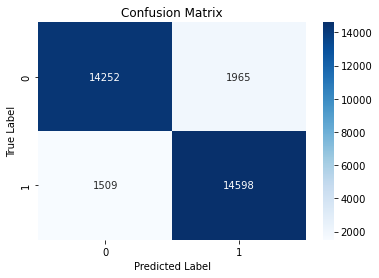

In [122]:
y_pred = model.predict(val_X)
y_pred = (y_pred > 0.5)

# compute the confusion matrix
cm = confusion_matrix(val_Y, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()